In [6]:
# 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
while True:
    try:
        p_list.remove(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', '비율', 'WAR', 'WPA'])
        p_list.remove(['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'])
    except:
        print('삭제완료')
        break

삭제완료


In [7]:
# (2021시즌 기록의 경우) ERA+ 지표가 생성되지 않은 선수들에 대해 np.nan값 입력
import numpy as np

for p in p_list:
    if len(p) != 33:
        p.insert(29, np.nan)

In [10]:
# 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
for p in p_list:
    pitch_df = pitch_df.append(pd.Series(p, index=pitch_df.columns), ignore_index=True)

In [11]:
pitch_df.head()

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR
0,1,미란다,21두,7.09,28,1,1,28,14,5,...,225,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27
1,2,백정현,21삼,5.28,27,0,0,27,14,5,...,109,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78
2,3,고영표,21K,5.23,26,1,1,25,11,6,...,130,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27
3,4,켈리,21L,4.96,30,0,0,30,13,8,...,142,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61
4,5,원태인,21삼,4.76,26,0,0,26,14,7,...,129,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41


In [12]:
pitch_df.shape

(308, 33)

In [13]:
# 시즌과 팀 이름 분리
pitch_df['시즌'] = pitch_df.팀.str[:2]
pitch_df['팀'] = pitch_df.팀.str[2:]
pitch_df.head()

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,미란다,두,7.09,28,1,1,28,14,5,...,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27,21
1,2,백정현,삼,5.28,27,0,0,27,14,5,...,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78,21
2,3,고영표,K,5.23,26,1,1,25,11,6,...,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27,21
3,4,켈리,L,4.96,30,0,0,30,13,8,...,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61,21
4,5,원태인,삼,4.76,26,0,0,26,14,7,...,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41,21


In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains
import time
import warnings
warnings.filterwarnings('ignore')

def crawler(year_xpath):
    # Chromedriver 옵션 설정
    options = webdriver.ChromeOptions()
    options.add_argument("headless")
    options.add_argument("window-size=976,1056")

    # execute driver & connect page
    driver = webdriver.Chrome('./chromedriver', options=options)
    driver.get('http://www.statiz.co.kr/stat.php?re=1&lr=0')
    time.sleep(3)

    # 스크롤을 위한 ActionChains 모듈 선언
    action = ActionChains(driver)
    
    # 연도 옵션 설정
    yearbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/button')
    time.sleep(2)
    yearbutton.click()
    
    # 연도 지정
    time.sleep(2)
    year_select = driver.find_element_by_xpath(year_xpath)
    driver.execute_script("window.scrollTo(0, 200);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    year_text = year_select.text
    year_select.click()
    
    # 100개씩 정렬하기 위한 옵션설정
    optionbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[8]/button')
    driver.execute_script("window.scrollTo(0, 100);") # 광고로 인해 옵션버튼이 가려질 수 있으므로
    time.sleep(2)
    optionbutton.click()

    # 정렬 개수 100개로 설정
    print_num = Select(driver.find_element_by_xpath('//*[@id="opt_div"]/div[2]/div[5]/form/select'))
    print_num.select_by_value('100')

    # 첫번째 다음버튼 선언 (2페이지부터는 '이전'버튼이 생겨 xpath가 바뀜)
    if year_text == '21':
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
    else:
        first_nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[2]')
        
    p_list = []
    count = 0
    while True:
        player = driver.find_element_by_id('mytable') # 크롤링 대상인 지표만을 선정
        count += 1
        for p in player.find_elements_by_tag_name('tr'):
            record = p.text
            p_list.append(record.split()) # 한 선수마다 하나의 list로 만들어서 저장
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # 맨 아래까지 스크롤, 광고로 가려짐을 피하기 위해
        if year_text == '21':
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[6]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        else :
            nextbutton = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[5]/div/div/div[4]/table/tbody/tr/td[2]/a[3]')
        time.sleep(2)
        if count == 1: # 첫 번째 페이지일 때
            first_nextbutton.click()
            time.sleep(2)
        else: # 두 번째 페이지 이상일 때
            if nextbutton.text == '마지막':
                print(count, '페이지 수집완료.')
                break
            nextbutton.click()
            time.sleep(2)
            
    return p_list

In [2]:
xpath_list = ['/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[34]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[35]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[36]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[37]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[38]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[39]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[40]',
              '/html/body/div[1]/div[1]/div/section[2]/div/div[2]/div[1]/div/div[1]/div/ul/div/button[41]']

In [3]:
crawling_list = []

for x in xpath_list:
    crawling_list.append(crawler(x))

3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
3 페이지 수집완료.
4 페이지 수집완료.


In [4]:
import numpy as np
import pandas as pd

def data_clear(crawling_list) :
    # 10명의 기록마다 컬럼명이 새로 생기므로 이를 없애줌
    while True:
        try:
            crawling_list.remove(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', '비율', 'WAR', 'WPA'])
            crawling_list.remove(['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'])
        except:
            print('삭제완료')
            break
        
    
    remove_list = []
    
    for c in crawling_list:
        if len(c) < 33:
            remove_list.append(c)
            
    for r in remove_list:
        crawling_list.remove(r)
        
    # dataframe에 사용할 컬럼명 list로 선언
    record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR']
    
    # 컬럼만 있는 빈 데이터프레임 생성
    pitch_df = pd.DataFrame(columns=record_col)
    
    # 각 선수들의 기록을 행 형태로 삽입하기 위하여 Series 형태로 변환 뒤 df에 삽입
    for c in crawling_list:
        pitch_df = pitch_df.append(pd.Series(c, index=pitch_df.columns), ignore_index=True)
        
    # 시즌과 팀 이름 분리
    pitch_df['시즌'] = pitch_df.팀.str[:2]
    pitch_df['팀'] = pitch_df.팀.str[2:]
    
    return pitch_df

In [6]:
# dataframe에 사용할 컬럼명 list로 선언
record_col = ['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR']

In [7]:
import pandas as pd

# 컬럼만 있는 빈 데이터프레임 생성
pitch_df = pd.DataFrame(columns=record_col)
pitch_df

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR


In [8]:
for c in crawling_list:
    df = data_clear(c)
    pitch_df = pd.concat([pitch_df, df])

삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료
삭제완료


In [26]:
pitch_df = pitch_df.astype({'이닝':'float'})

In [12]:
pitch_df.columns

Index(['순', '이름', '팀', '정렬', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WPA', 'WAR', '시즌'],
      dtype='object')

In [27]:
pitch_14 = pitch_df[pitch_df['시즌'] == '14']
pitch_14

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,밴헤켄,넥,6.92,31,0,0,31,20,6,...,2,6,3.51,3.48,1.32,150.1,152.1,6.92,1.24,14
1,2,밴덴헐크,삼,6.00,25,1,0,25,13,4,...,0,4,3.18,3.76,1.11,166.1,139.7,6.00,1.90,14
2,3,김광현,S,5.20,28,1,0,28,13,9,...,1,9,3.42,4.37,1.49,149.2,118.8,5.20,0.94,14
3,4,니퍼트,두,5.03,30,1,0,28,14,7,...,0,10,3.81,4.23,1.31,129.7,118.7,5.03,0.22,14
4,5,양현종,K,4.99,29,0,0,29,16,8,...,0,5,4.25,4.24,1.40,122.7,125.1,4.99,2.03,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,207,김혁민,한,-0.48,17,0,0,4,0,4,...,0,7,11.15,7.38,2.35,48.6,71.6,-0.48,-2.25,14
195,208,백인식,S,-0.52,6,0,0,2,0,1,...,0,2,18.32,10.61,3.11,27.9,49.7,-0.52,-0.74,14
196,209,강윤구,넥,-0.65,24,0,0,6,1,1,...,1,6,7.71,9.76,2.19,68.3,55.9,-0.65,-1.92,14
197,210,고효준,S,-0.73,21,0,0,8,2,5,...,0,5,9.18,7.62,2.06,55.6,68.8,-0.73,-1.51,14


In [28]:
pitch_15 = pitch_df[pitch_df['시즌'] == '15']
pitch_15

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,양현종,K,8.14,32,1,1,31,15,6,...,0,6,2.44,4.57,1.24,202.1,108.5,8.14,3.94,15
1,2,린드블럼,롯,6.48,32,2,1,32,13,11,...,0,12,3.56,4.55,1.18,141.7,108.6,6.48,1.95,15
2,3,해커,N,5.64,31,1,0,31,19,5,...,0,6,3.13,3.78,1.03,152.9,129.0,5.64,3.14,15
3,4,밴헤켄,넥,5.12,32,0,0,32,15,8,...,0,16,3.62,3.60,1.31,137.7,137.6,5.12,0.54,15
4,5,우규민,L,4.95,25,1,0,25,11,9,...,0,2,3.42,3.73,1.18,137.3,125.5,4.95,0.99,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,240,유창식,한K,-0.96,27,0,0,12,0,8,...,0,8,7.90,6.87,1.96,62.6,71.8,-0.96,-2.69,15
228,241,어윈,k,-1.05,12,0,0,12,1,7,...,0,2,8.68,5.71,1.98,57.9,85.3,-1.05,-2.34,15
229,242,김택형,넥,-1.07,37,0,0,10,4,4,...,0,9,7.91,5.77,2.09,62.9,86.0,-1.07,-2.19,15
230,243,진야곱,두,-1.30,47,0,0,14,5,9,...,4,9,7.01,5.11,1.83,66.9,91.4,-1.30,-2.28,15


In [29]:
pitch_16 = pitch_df[pitch_df['시즌'] == '16']
pitch_16

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,헥터,K,6.64,31,3,1,31,15,5,...,0,7,3.40,3.72,1.27,152.5,140.6,6.64,1.87,16
1,2,니퍼트,두,5.97,28,1,1,27,22,3,...,0,8,2.95,4.44,1.24,173.1,113.2,5.97,2.69,16
2,3,켈리,S,5.95,31,0,0,31,9,8,...,2,8,3.68,4.25,1.32,141.7,122.9,5.95,1.32,16
3,4,양현종,K,5.69,31,3,0,31,10,12,...,2,6,3.68,4.75,1.34,140.6,109.9,5.69,0.23,16
4,5,장원준,두,5.67,27,0,0,27,15,6,...,0,8,3.32,4.76,1.41,153.9,105.9,5.67,1.29,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,246,플란데,삼,-0.87,13,0,0,13,2,6,...,4,1,7.60,6.11,1.82,69.4,85.6,-0.87,-2.45,16
237,247,이명우,롯,-0.95,45,0,0,2,2,3,...,0,1,9.27,5.61,1.79,56.4,93.4,-0.95,-0.54,16
238,248,양훈,넥,-0.99,20,0,0,13,1,6,...,0,1,8.28,6.14,2.07,63.4,84.2,-0.99,-2.87,16
239,249,마에스트리,한,-1.00,9,0,0,8,2,2,...,0,6,9.42,7.66,2.48,55.8,68.4,-1.00,-1.89,16


In [30]:
pitch_17 = pitch_df[pitch_df['시즌'] == '17']
pitch_17

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,헥터,K,5.80,30,1,0,30,20,5,...,0,7,3.48,4.34,1.32,142.7,115.0,5.80,1.34,17
1,2,장원준,두,5.41,29,1,1,29,14,9,...,0,3,3.14,4.26,1.24,153.1,114.0,5.41,1.41,17
2,3,피어밴드,k,5.26,26,1,1,26,8,10,...,0,4,3.04,4.42,1.15,166.9,112.8,5.26,1.00,17
3,4,켈리,S,5.06,30,0,0,30,16,7,...,1,9,3.60,3.69,1.31,139.8,136.9,5.06,1.60,17
4,5,레일리,롯,5.03,30,1,0,30,13,7,...,1,3,3.80,4.37,1.30,132.7,115.2,5.03,1.25,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,235,황수범,삼,-0.81,10,0,0,7,1,2,...,1,8,8.04,6.99,2.04,63.1,72.4,-0.81,-1.41,17
223,236,장민재,한,-0.94,33,0,0,5,2,5,...,0,6,7.76,6.21,1.87,64.8,81.6,-0.94,-2.95,17
224,237,최금강,N,-0.96,39,0,0,13,5,3,...,0,12,7.33,6.31,1.62,67.7,79.5,-0.96,-1.33,17
225,238,정성곤,k,-1.18,26,0,0,20,3,12,...,1,8,8.11,6.12,1.78,62.5,81.4,-1.18,-3.47,17


In [31]:
pitch_18 = pitch_df[pitch_df['시즌'] == '18']
pitch_18

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,린드블럼,두,6.81,26,0,0,26,15,4,...,0,10,2.88,4.02,1.07,175.4,125.2,6.81,2.06,18
1,2,윌슨,L,6.31,26,1,1,26,9,4,...,1,10,3.07,3.63,1.14,164.3,139.4,6.31,2.72,18
2,3,브리검,넥,5.78,31,2,1,30,11,7,...,0,4,3.84,4.36,1.20,134.1,117.4,5.78,0.20,18
3,4,김광현,S,5.26,25,0,0,25,11,8,...,0,3,2.98,4.16,1.14,176.5,127.4,5.26,1.91,18
4,5,양현종,K,5.21,29,3,0,29,13,11,...,0,5,4.15,4.38,1.31,123.7,117.9,5.21,-1.06,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,256,박세진,K,-0.95,8,0,0,8,1,5,...,0,3,10.68,8.42,2.18,49.6,61.7,-0.95,-1.27,18
245,257,주권,K,-1.04,46,0,0,10,3,9,...,0,4,8.39,6.09,1.65,63.2,85.1,-1.04,-2.79,18
246,258,김대현,L,-1.19,25,0,0,21,2,10,...,2,7,7.54,6.10,1.84,66.9,82.2,-1.19,-3.86,18
247,259,박세웅,롯,-1.20,14,0,0,12,1,5,...,0,3,9.92,6.87,2.29,52.6,76.1,-1.20,-2.21,18


In [32]:
pitch_19 = pitch_df[pitch_df['시즌'] == '19']
pitch_19

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,양현종,K,7.35,29,2,2,29,16,8,...,0,1,2.29,2.63,1.07,183.1,160.3,7.35,3.81,19
1,2,린드블럼,두,6.86,30,0,0,30,20,3,...,0,7,2.50,2.87,1.00,164.4,141.5,6.86,4.44,19
2,3,김광현,S,6.39,31,0,0,30,17,6,...,0,8,2.51,3.01,1.24,169.8,142.2,6.39,3.28,19
3,4,산체스,S,5.93,28,0,0,28,17,5,...,2,11,2.62,2.57,1.17,162.5,163.8,5.93,3.64,19
4,5,루친스키,N,4.64,30,2,0,30,9,9,...,0,7,3.05,3.96,1.18,138.4,106.6,4.64,2.51,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,253,문동욱,한,-0.89,12,0,0,1,1,1,...,0,1,12.06,5.70,2.55,34.3,72.5,-0.89,-0.63,19
241,254,박주홍,한,-0.99,29,0,0,6,0,4,...,1,1,7.98,6.74,1.96,51.9,61.6,-0.99,-1.72,19
242,255,최충연,삼,-1.03,34,0,0,2,0,2,...,0,6,7.36,5.15,2.24,58.9,82.3,-1.03,-1.22,19
243,256,홍건희,K,-1.10,21,0,0,14,2,9,...,0,7,7.16,5.36,1.78,58.5,77.7,-1.10,-2.02,19


In [33]:
pitch_20 = pitch_df[pitch_df['시즌'] == '20']
pitch_20

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,알칸타라,두,8.31,31,1,0,31,20,2,...,1,3,2.54,3.10,1.03,182.6,149.7,8.31,4.35,20
1,2,스트레일리,롯,7.53,31,0,0,31,15,4,...,0,4,2.50,3.01,1.02,195.1,159.0,7.53,3.84,20
2,3,브룩스,K,7.16,23,1,1,23,11,4,...,1,3,2.50,2.72,1.02,192.2,177.8,7.16,3.39,20
3,4,루친스키,N,5.59,30,0,0,30,19,5,...,0,11,3.05,3.84,1.26,160.2,125.8,5.59,3.04,20
4,5,요키시,키,5.53,27,0,0,27,12,7,...,1,3,2.14,3.19,1.06,220.3,147.3,5.53,3.20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,279,김주한,S,-0.75,22,0,0,7,1,7,...,0,4,7.43,6.40,1.74,64.9,76.2,-0.75,-1.84,20
269,280,이민우,K,-0.75,22,0,0,22,6,10,...,0,3,6.79,5.14,1.66,70.7,93.3,-0.75,-2.87,20
270,281,윤정현,키,-0.86,15,0,0,4,0,1,...,0,1,8.89,5.49,2.34,53.1,84.9,-0.86,-1.07,20
271,282,장지훈,삼,-0.98,29,0,0,0,0,1,...,0,5,10.08,7.71,2.17,48.6,63.9,-0.98,-1.11,20


In [34]:
pitch_21 = pitch_df[pitch_df['시즌'] == '21']
pitch_21

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,미란다,두,7.09,28,1,1,28,14,5,...,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27,21
1,2,백정현,삼,5.28,27,0,0,27,14,5,...,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78,21
2,3,고영표,K,5.23,26,1,1,25,11,6,...,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27,21
3,4,켈리,L,4.96,30,0,0,30,13,8,...,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61,21
4,5,원태인,삼,4.76,26,0,0,26,14,7,...,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,304,김진성,N,-1.07,42,0,0,0,2,4,...,0,2,7.17,5.06,1.62,63.3,89.9,-1.07,-1.25,21
282,305,신정락,한,-1.08,20,0,0,0,0,2,...,0,0,8.55,6.28,2.00,51.2,71.0,-1.08,-0.78,21
283,306,이민우,K,-1.13,16,1,0,12,1,6,...,1,2,8.05,6.07,1.91,55.2,73.0,-1.13,-1.84,21
284,307,장시환,한,-1.38,19,1,0,16,0,11,...,0,7,7.04,4.99,1.96,62.2,89.5,-1.38,-2.32,21


In [59]:
pitch_21[pitch_21['이닝'] >= 144]

,순,이름,팀,정렬,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WPA,WAR,시즌
0,1,미란다,두,7.09,28,1,1,28,14,5,...,1,7,2.33,2.67,1.14,185.0,161.1,7.09,3.27,21
1,2,백정현,삼,5.28,27,0,0,27,14,5,...,0,5,2.63,4.21,1.24,171.9,107.3,5.28,1.78,21
2,3,고영표,K,5.23,26,1,1,25,11,6,...,0,1,2.92,3.19,1.04,154.0,139.2,5.23,2.27,21
3,4,켈리,L,4.96,30,0,0,30,13,8,...,1,7,3.15,3.76,1.24,136.8,115.1,4.96,1.61,21
4,5,원태인,삼,4.76,26,0,0,26,14,7,...,1,5,3.06,3.65,1.25,147.4,123.4,4.76,2.41,21
5,6,요키시,키,4.66,31,0,0,31,16,9,...,0,9,2.93,3.54,1.20,151.4,122.4,4.66,1.62,21
6,7,뷰캐넌,삼,4.55,30,1,1,30,16,5,...,0,7,3.10,3.46,1.31,145.5,130.3,4.55,1.66,21
7,8,루친스키,N,4.48,30,0,0,30,15,10,...,2,6,3.17,3.32,1.20,143.1,135.9,4.48,1.88,21
9,10,최원준,두,4.13,29,0,0,29,12,4,...,0,0,3.30,4.01,1.24,130.8,107.1,4.13,1.17,21
11,12,데스파이네,K,4.01,33,0,0,33,13,10,...,0,15,3.39,3.62,1.34,132.6,122.7,4.01,0.79,21


In [41]:
pitch_list = [pitch_14, pitch_15, pitch_16, pitch_17, pitch_18, pitch_19, pitch_20, pitch_21]

for p in pitch_list:
    print(p[p['이닝'] >= 144].shape[0])

18
20
17
19
25
27
20
19


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

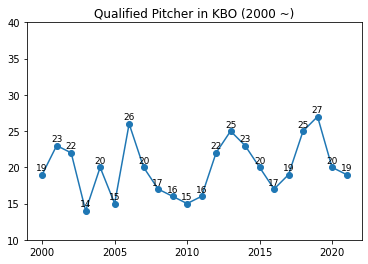

In [27]:
x = range(2000, 2022)
y = qualified[18:]
graph = plt.plot(x, y, marker='o')
plt.ylim(10, 40)
plt.title('Qualified Pitcher in KBO (2000 ~)')
# plt.figure(figsize=(10,6))

for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height+0.3, '%.0f' %height, ha='center', va='bottom', size=9)

plt.show()

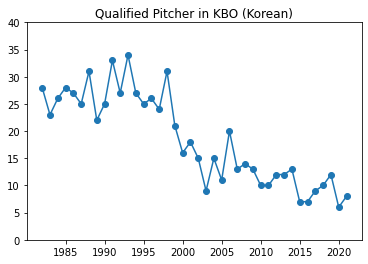

In [16]:
x = range(1982, 2022)
y = korean
graph = plt.plot(x, y, marker='o')
plt.ylim(0, 40)
plt.title('Qualified Pitcher in KBO (Korean)')

plt.show()

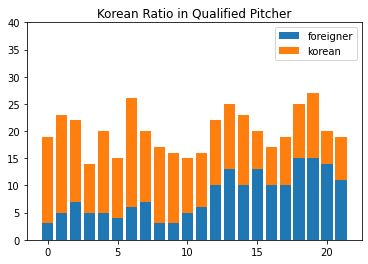

In [40]:
bar = plt.bar(range(len(foreign[18:])), foreign[18:])
bar = plt.bar(range(len(korean[18:])), korean[18:], bottom=foreign[18:])
plt.ylim(0, 40)
plt.title('Korean Ratio in Qualified Pitcher')
plt.legend(['foreigner', 'korean'])

plt.show()

In [1]:
qualified = [28, 23, 26, 28, 27, 25, 31, 22, 25, 33, 27, 34, 27, 25, 26, 24, 31, 21, 19, 23, 22, 14, 20, 15, 26, 20, 17, 16, 15, 16, 22, 25, 23, 20, 17, 19, 25, 27, 20, 19]

In [2]:
# 00년부터 외국인투수
foreign = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3, 5, 7, 5, 5, 4, 6, 7, 3, 3, 5, 6, 10, 13, 10, 13, 10, 10, 15, 15, 14, 11]

In [39]:
korean = []

for i in range(len(qualified)):
    korean.append(qualified[i] - foreign[i])

In [41]:
print(korean)

[28, 23, 26, 28, 27, 25, 31, 22, 25, 33, 27, 34, 27, 25, 26, 24, 31, 21, 16, 18, 15, 9, 15, 11, 20, 13, 14, 13, 10, 10, 12, 12, 13, 7, 7, 9, 10, 12, 6, 8]


In [26]:
import numpy as np

np.mean(qualified[:18])

26.833333333333332